Student Performance Indicater

Life cycle of Machine Learning Project
   >Understanding the problem Statement
   >Data Collection
   >Data Checks to perform
   >Exploratory data analysis
   >Data Pre-Processing
   >Model Training
   >Choose a Model


1) Problem Statement
   >This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental level of education, lunch and Test preparation course.

2) Data Collection
   > Dataset Source - 
   > 

2.1 Import Data and Required Paceges

importing pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                    

Import the CSV Data as pandas DataFrame


In [3]:
df = pd.read_csv('D:/ML PROJECTS/note book/data/StudentsPerformance.csv')

Show top 5 rows


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
df.shape

(1000, 8)

2.2 Dataset information

> gender:sex of students ->(Male/Feamale)
> race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
> Parental level of educationn: parents final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
> lunch: having lunch before test (standard or free/reduced)
> test preparation course: complete or not complete before test
> math score
> reading score
> writing score

3) Data Checks to perform
. Check missing values
. Check Duplicates
. Check data type
. Check the number of unique values of each column
. Check statistics of data set
. Check various categories present in the different categorical column 

3.1 Check missing values

In [6]:
df.isna().sum()
#df.describe()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values

3.2  Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There is no duplicate values


3.3 Check data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

     . From above description of numerical data, all means are very close to each other - between 66 and 68.05;
    . All standard deviations are close - between 14.6 and 15,19;
    . While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher =17

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.7 Exploring data 

In [12]:
print("Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of eduction'  variable:   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of eduction'  variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns for "Total Scoe" and "Average"

In [19]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()
# Plotting the distribution of total score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average sore,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [22]:
reading_full = df[df['reading score'] == 100]['average score'].count()
wrinting_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print("Number of students who scored full marks in reading: ", reading_full)
print("Number of students who scored full marks in writing: ", wrinting_full)   
print("Number of students who scored full marks in math: ", math_full)
# Plotting the distribution of average score    



Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14
Number of students who scored full marks in math:  7


In [23]:
reading_less_20 = df[df['reading score'] < 20]['average score'].count()
writing_less_20 = df[df['writing score'] < 20]['average score'].count() 
math_less_20 = df[df['math score'] < 20]['average score'].count()

print("Number of students who scored less than 20 in reading: ", reading_less_20)
print("Number of students who scored less than 20 in writing: ", writing_less_20)
print("Number of students who scored less than 20 in math: ", math_less_20)
# Plotting the distribution of average score less than 20

Number of students who scored less than 20 in reading:  1
Number of students who scored less than 20 in writing:  3
Number of students who scored less than 20 in math:  4


Insights
   . From above values we get students have performed the worst in maths
   . Best performance is in reading section

4. Exploring Data (visualization)

4.1 Visualize average score distribution to make some conclusion.
   . Histogram
   . Kernal Distribution Function (KDE)


4.2 Histogram & KDE


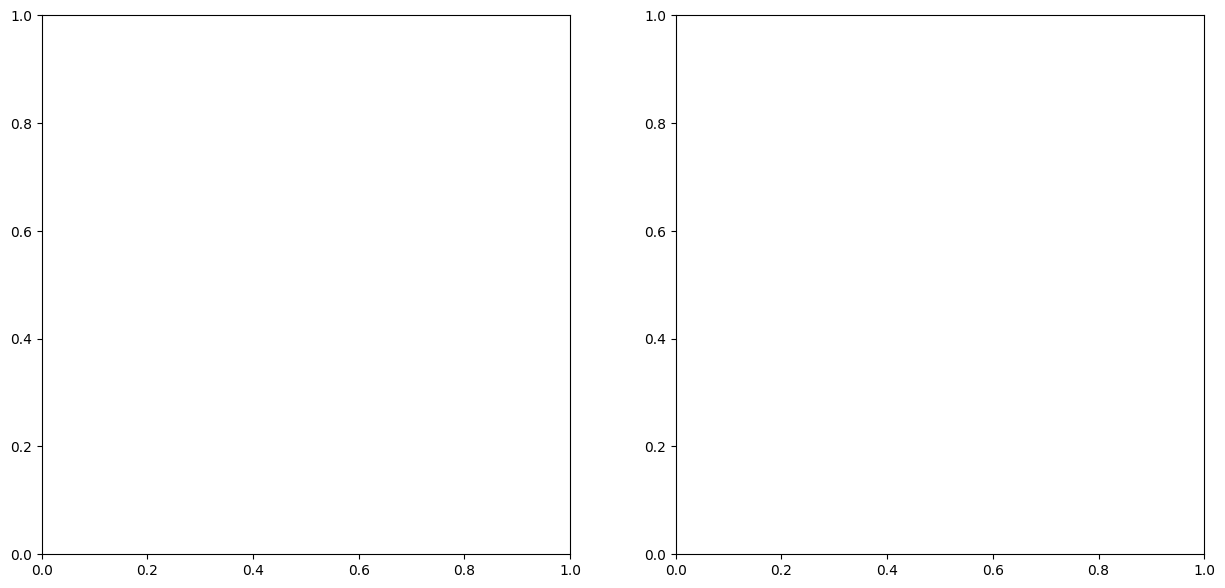

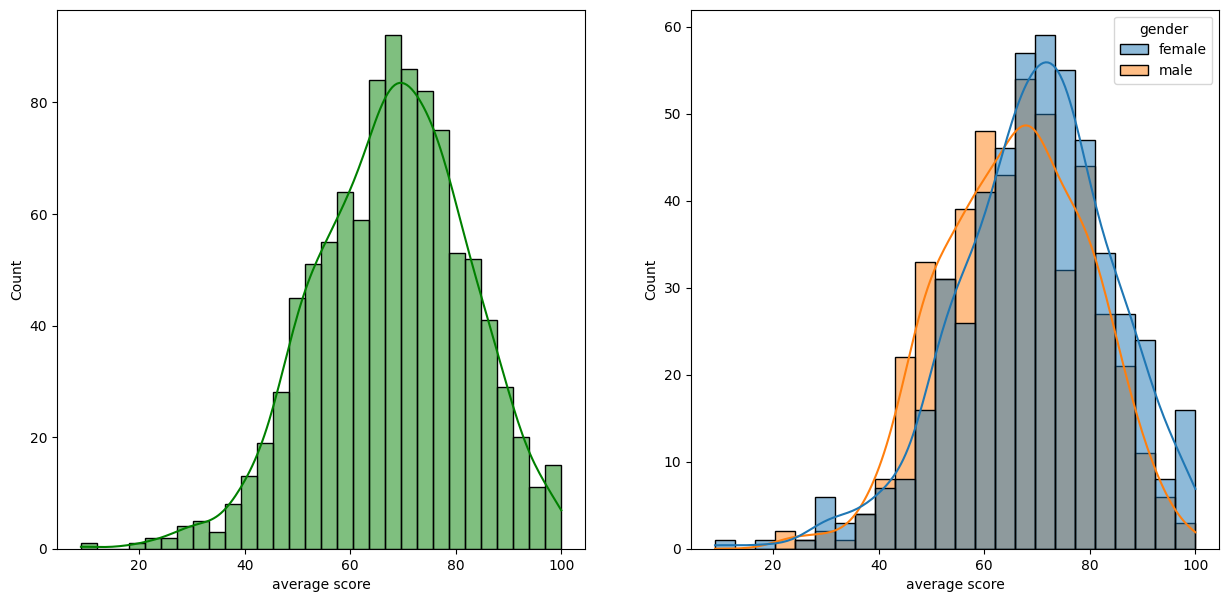

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average score' , bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True,hue='gender')
plt.show() 